# Migration simulation in EU - data analysis

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

__Data origin__ <br>
Data was gathered especially from EU reports and then saved in .csv format.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def read_data_from_csv(filename: str) -> pd.DataFrame:
    return pd.read_csv('data/' + filename + '.csv', sep=';', index_col='Country')

## Population
Number of people who live in each EU country.
    - Max value: 82162000 [Germany]
    - Min value: 434403 [Malta]

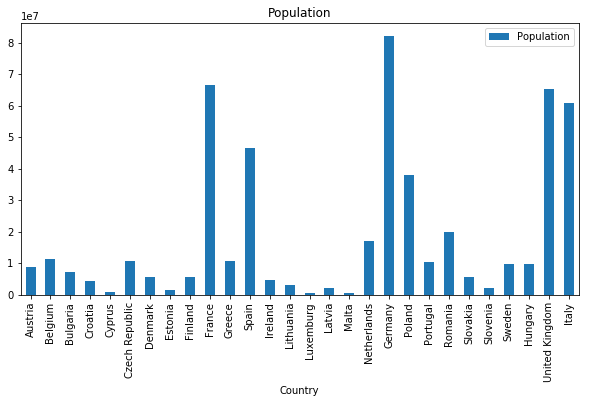

In [3]:
df_population = read_data_from_csv(filename='population')
df_population.plot(kind='bar', title="Population", figsize=(10, 5), legend=True, fontsize=10)

To keep relation between different countries and number of citizens I have decided to choose agent's origin country with the probability

$$\frac{\text{number of people in selected country}}{\text{number of people in all countries}}$$

calculated for each country.<br>
Below data frame shows probabilities for some randomly choosen countries.

In [4]:
df_country_as_origin_probability = df_population / df_population.sum()
display(df_country_as_origin_probability.sample(5))

,Population
Country,
Czech Republic,0.020688
United Kingdom,0.128163
Ireland,0.009259
Belgium,0.022130
Bulgaria,0.014023


In [5]:
display(df_country_as_origin_probability.loc[df_country_as_origin_probability['Population'].idxmin()])

Population    0.000852
Name: Malta, dtype: float64

Probability to be born in Malta has the lowest value - 0.0852%. Based on it, I need more than 10 000 agents to have about 8 agents from this country.

## Immigrants
Number of immigrants in each EU country.
    - Max value: 9845244 [Germany]
    - Min value: 20289 [Malta]

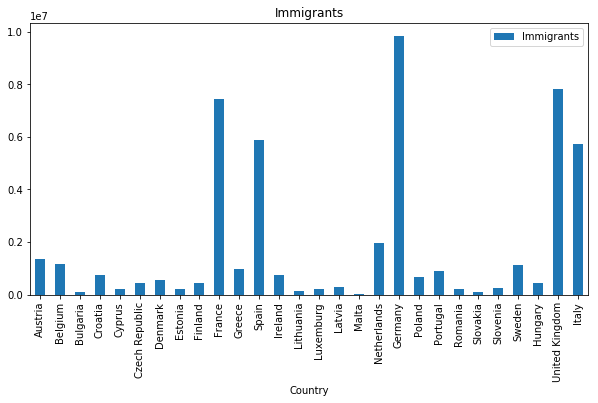

In [6]:
df_immigrants = read_data_from_csv(filename='immigrants')
df_immigrants.plot(kind='bar', title="Immigrants", figsize=(10, 5), legend=True, fontsize=10)

## Relation between population and immigrants

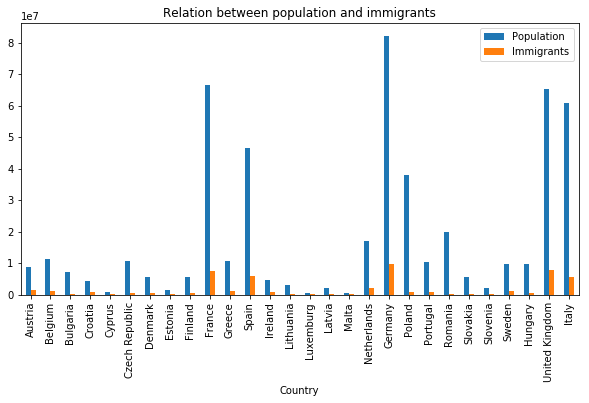

In [7]:
df_relation = pd.concat([df_population, df_immigrants], axis=1, sort=False)
df_relation.plot(kind='bar', title="Relation between population and immigrants", figsize=(10, 5), legend=True,
                 fontsize=10)

## How many people in selected country are immigrants?
As some of the features are appropriate only for immigrants, it will be useful to keep this information. <br>
Below dataframe shows the probability of being an immigrants in selected country at the beggining of simulation.

In [8]:
df_immigrants_to_population = pd.DataFrame(
    df_immigrants['Immigrants'] / df_population['Population'],
    columns=['Immigrants probability'])
display(df_immigrants_to_population.sample(5))

,Immigrants probability
Country,
Ireland,0.155715
United Kingdom,0.119667
Czech Republic,0.041607
Greece,0.091642
Italy,0.094311


## Interaction with immigrants frequency

In [9]:
df_interaction_with_immigrants = read_data_from_csv(filename='how_often_interact_with_immigrants')
display(df_interaction_with_immigrants.sample(5))

,Daily integration with immigrants in one or two different contexts,Daily integration with immigrants in three different contexts or more,Weekly interaction with immigrants,Less frequent interaction with immigrants,Does not know or not applicable in all contexts
Country,,,,,
Belgium,0.30,0.15,0.25,0.30,0.00
Poland,0.16,0.03,0.22,0.53,0.06
Spain,0.29,0.22,0.28,0.21,0.02
Hungary,0.07,0.01,0.11,0.78,0.03
Romania,0.03,0.01,0.05,0.79,0.12


I have decided to stay only with values for __frequent__ and __less frequent__ integration. <br>

Frequent integration is a sum of:
- Daily integration with immigrants in one or two different contexts
- Daily integration with immigrants in three different contexts or more
- Weekly interaction with immigrants

In [10]:
df_integration_frequency= pd.DataFrame(df_interaction_with_immigrants.groupby('Country')
                             [['Daily integration with immigrants in one or two different contexts', 
                               'Daily integration with immigrants in three different contexts or more',
                               'Weekly interaction with immigrants']].agg(sum).agg('sum', axis=1), columns=['Frequent integration'])
df_integration_frequency['Less frequent integration'] = df_interaction_with_immigrants['Less frequent interaction with immigrants'].copy()

How it looks after preprocessing?

In [11]:
display(df_integration_frequency.sample(5))

,Frequent integration,Less frequent integration
Country,,
Latvia,0.32,0.64
Croatia,0.26,0.70
Belgium,0.70,0.30
Greece,0.83,0.17
Estonia,0.32,0.62


Let's look in which country people have the highest/the lowest score

In [12]:
print('Frequent integration:')
display(df_integration_frequency.sort_values(['Frequent integration'], ascending=False)['Frequent integration'].head(5))

print('Less frequent integration:')
display(df_integration_frequency.sort_values(['Less frequent integration'], ascending=False)['Frequent integration'].head(5))

Frequent integration:


Country
Greece     0.83
Ireland    0.82
Sweden     0.81
Spain      0.79
Malta      0.75
Name: Frequent integration, dtype: float64

Less frequent integration:


Country
Bulgaria     0.07
Romania      0.09
Hungary      0.19
Lithuania    0.18
Croatia      0.26
Name: Frequent integration, dtype: float64

## Relationships
It shows how comfortable people feel when their children is in a relationship with a Black person/an Asian person/a Muslim/a Jew.

In [13]:
df_children_relationship = read_data_from_csv(filename='children_relationship')
display(df_children_relationship.sample(5))

,Would you feel comfortable if one of your children was in a relationship with a Black person?,Would you feel comfortable if one of your children was in a relationship with an Asian person?,Would you feel comfortable if one of your children was in a relationship with a Muslim?,Would you feel comfortable if one of your children was in a relationship with a Jew?
Country,,,,
Greece,0.4-0.49,0.4-0.49,0.3-0.39,0.4-0.49
Portugal,0.6-0.69,0.6-0.69,0.5-0.59,0.6-0.69
Finland,0.6-0.69,0.7-0.79,0.3-0.39,0.7-0.79
Lithuania,0.3-0.39,0.3-0.39,0.2-0.29,0.4-0.49
Austria,0.5-0.59,0.6-0.69,0.4-0.49,0.6-0.69


__df_children_relationship__ does not contain values for:
- _"Would you feel comfortable if one of your children was in a relationship with a White person?"_ <br>
White race is one of the most common race in EU.
- _"Would you feel comfortable if one of your children was in a relationship with a Christian?"_ <br>
Christians are one of the most common religious in EU.

But before adding it, data should be preprocessed not to contain intervals and NaN value.

#### Intervals
Intervals will be changed to mean value (taking into consideration the lowest and the highest value).

In [14]:
def change_interval_to_mean_value_in_all_columns(df):
    for column in df.columns:
        df['temp'], df['temp1'] = df[column].str.split('-', 1).str
        df[column] = (df['temp'].astype(float) + df['temp1'].astype(float)) / 2
        del df['temp']
        del df['temp1']
    return df

In [15]:
df_children_relationship = change_interval_to_mean_value_in_all_columns(df_children_relationship)

#### Missing values
This dataframe contains NaN value which is not allowed for future data processing.
I have decided to change it to mean value for column.

In [16]:
# entry with missing value
display(df_children_relationship[df_children_relationship.isnull().any(axis=1)])

df_children_relationship.fillna(df_children_relationship.iloc[:, -1].mean(), inplace=True)

,Would you feel comfortable if one of your children was in a relationship with a Black person?,Would you feel comfortable if one of your children was in a relationship with an Asian person?,Would you feel comfortable if one of your children was in a relationship with a Muslim?,Would you feel comfortable if one of your children was in a relationship with a Jew?
Country,,,,
Denmark,0.845,0.845,0.545,NaN


#### Values generation
As Christians and White people are respectively the most popular race and religious in EU, I have decided to generate missing values.
- _"Would you feel comfortable if one of your children was in a relationship with a White person?"_ <br>
Value is taken as **0.2 + max value selected from**:
    1. 'Would you feel comfortable if one of your children was in a relationship with a Black person?'
    2. 'Would you feel comfortable if one of your children was in a relationship with an Asian person?'<br>
**upper clipped to 0.85** <br> <br>

- _"Would you feel comfortable if one of your children was in a relationship with a Christian?_" <br>
Value is taken as **0.2 + max value selected from**:
    1. 'Would you feel comfortable if one of your children was in a relationship with a Muslim?'
    2. 'Would you feel comfortable if one of your children was in a relationship with a Jew?'<br>
**upper clipped to 0.85**

In [17]:
beginning_of_sentence = 'Would you feel comfortable if one of your children was in a relationship with '

df_children_relationship[
    beginning_of_sentence + 'a Christian?'] = (
        df_children_relationship[
            [beginning_of_sentence + 'a Jew?',
             beginning_of_sentence + 'a Muslim?']].max(
            axis=1) + 0.2).clip(upper=0.85)

df_children_relationship[
    beginning_of_sentence + 'a White person?'] = (
        df_children_relationship[
            [beginning_of_sentence + 'a Black person?',
             beginning_of_sentence + 'an Asian person?']].max(
            axis=1) + 0.2).clip(upper=0.85)

How it looks after preprocessing?

In [18]:
display(df_children_relationship.sample(5))

,Would you feel comfortable if one of your children was in a relationship with a Black person?,Would you feel comfortable if one of your children was in a relationship with an Asian person?,Would you feel comfortable if one of your children was in a relationship with a Muslim?,Would you feel comfortable if one of your children was in a relationship with a Jew?,Would you feel comfortable if one of your children was in a relationship with a Christian?,Would you feel comfortable if one of your children was in a relationship with a White person?
Country,,,,,,
Lithuania,0.345,0.345,0.245,0.445,0.645,0.545
France,0.745,0.845,0.645,0.845,0.850,0.850
Germany,0.545,0.645,0.445,0.645,0.845,0.845
Latvia,0.445,0.545,0.345,0.645,0.845,0.745
Slovakia,0.245,0.245,0.145,0.445,0.645,0.445


## Social relations

In [19]:
df_immigrant_as_your_X = read_data_from_csv(filename='feel_comfortable_or_uncomfortable_having_an_immigrant_as_your_X')
display(df_immigrant_as_your_X.sample(5))

,Feel comfortable with all the social relations,Feel uncomfortable with at least one social relation,Does not know in at least one social relation
Country,,,
Latvia,0.41,0.49,0.10
Czech Republic,0.31,0.64,0.05
Cyprus,0.43,0.52,0.05
Finland,0.50,0.44,0.06
Denmark,0.64,0.28,0.08


Let's see in which country people feel the most comfortable/uncomfortable with social relations with immigrants.

In [20]:
print('Comfortable:')
display(df_immigrant_as_your_X.iloc[:, 0:1].sum(axis=1).sort_values(ascending=False).head(5))

print('Uncomfortable:')
display(df_immigrant_as_your_X.iloc[:, 0:1].sum(axis=1).sort_values(ascending=True).head(5))

Comfortable:


Country
Spain          0.83
Sweden         0.81
Ireland        0.80
Portugal       0.79
Netherlands    0.79
dtype: float64

Uncomfortable:


Country
Bulgaria          0.15
Hungary           0.17
Czech Republic    0.31
Greece            0.37
Romania           0.39
dtype: float64

In [21]:
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

def visualize_data_on_pie_chart(country: str, 
                                dataframe: pd.DataFrame):
    _, ax = plt.subplots()
    dataframe.loc[country].plot(kind='pie', autopct=custom_autopct, title=country.upper(), ax=ax, cmap='summer',
                                             startangle=200)
    ax.set_ylabel('')
    ax.legend(bbox_to_anchor=(0, 1))
    ax.axis('equal')
    plt.show()

People in Spain feel the most comfortable with social relations with immigrants. <br>
Below is the visualization for this country.

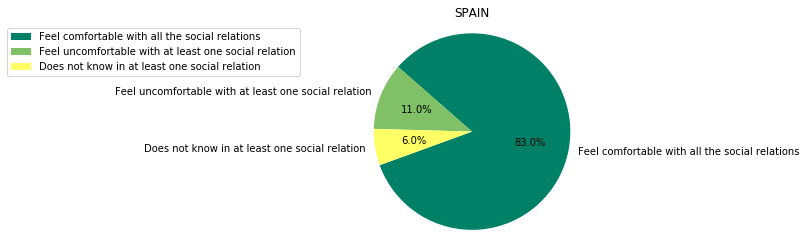

In [22]:
visualize_data_on_pie_chart('Spain', df_immigrant_as_your_X)

People in Bulgaria feel the most uncomfortable with social relations with immigrants. <br>
Below is the visualization for this country.

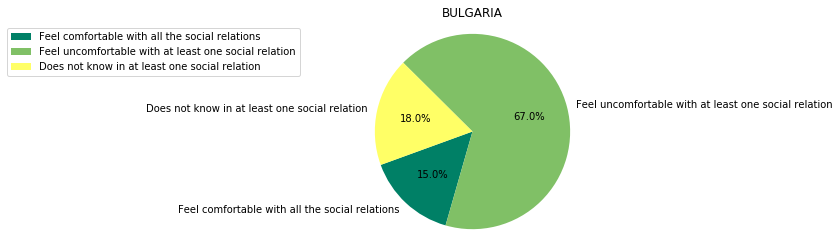

In [23]:
visualize_data_on_pie_chart('Bulgaria', df_immigrant_as_your_X)

It looks like Spain and Bulgaria have almost opposite values for:
- _Feel comfortable with all the social relations_
- _Feel uncomfortable with at least one social relation_

## Migration to another country
It shows how many people think about moving to another country __within the next 10 years__.

In [24]:
df_migration_to_another_country = read_data_from_csv(filename='move_to_another_country_within_the_next_ten_years')

# entry with missing value
display(df_migration_to_another_country[df_migration_to_another_country.isnull().any(axis=1)])

,Totally likely,Not likely,Dont know
Country,,,
Croatia,NaN,NaN,NaN


For future data processing, df_migration_to_another_country cannot contain NaN values. It will be a subject for preprocessing.

In [25]:
df_migration_to_another_country.fillna(df_migration_to_another_country.mean(), inplace=True)

In [26]:
display(df_migration_to_another_country.sample(5))

,Totally likely,Not likely,Dont know
Country,,,
Cyprus,0.14,0.84,0.02
Slovakia,0.09,0.89,0.02
Hungary,0.07,0.91,0.02
Lithuania,0.24,0.75,0.01
Greece,0.08,0.90,0.02


#### Likely to travel within the next 10 years
In the below diagram we can observe how many percents of people are likely to travel within the next 10 years.<br>
More than 1/3 of Latvian citizens want to change place of a residence.<br>
People who live in Czech Republic do not want to change country. Only about 5% of them wish to travel somewhere.

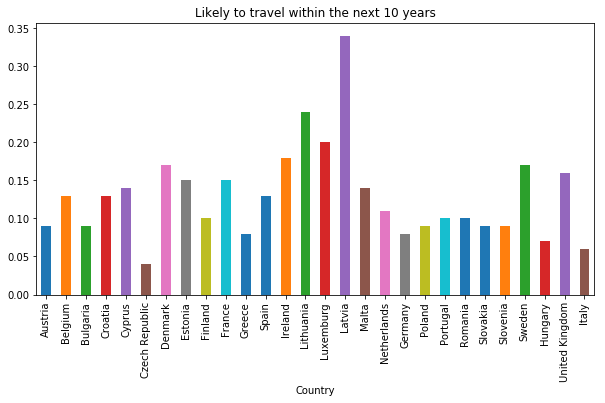

In [27]:
df_migration_to_another_country.loc[:, 'Totally likely'].plot(kind='bar',
                                                            title="Likely to travel within the next 10 years",
                                                            figsize=(10, 5), legend=False, fontsize=10)

#### Not likely to travel within the next 10 years
In comparison to _Likely to travel within the next 10 years_ diagram, below one (for _Not likely to travel within the next 10 years_) is not as various as above one. <br>
An average of about 84.5% people would stay in current place.

In [28]:
df_migration_to_another_country.loc[:,'Not likely'].mean()

0.844814814814815

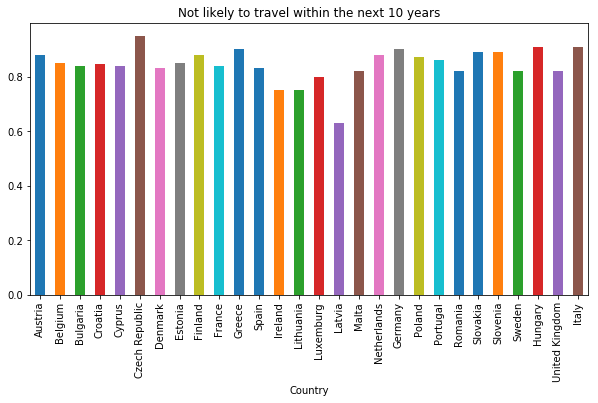

In [29]:
df_migration_to_another_country.loc[:, 'Not likely'].plot(kind='bar',
                                                          title="Not likely to travel within the next 10 years",
                                                          figsize=(10, 5), legend=False, fontsize=10)

## What people think about migration to their country
It can be considered as:
- "My country is a good place to live, I would recommend it."
- "I have nothing against immigrants in my country"
- Anxiety about job loss due to immigration <br>

The voting reasons can be totally different due to actual situation in each country.

In [30]:
df_migration_to_my_country = read_data_from_csv(filename='immigration_into_our_country_is_a_good_thing')
display(df_migration_to_my_country.sample(5))

,Strongly agree,Agree,Disagree,Strongly disagree,Neither agree nor disagree,Don’t know
Country,,,,,,
United Kingdom,0.14,0.42,0.15,0.04,0.23,0.02
Ireland,0.22,0.46,0.11,0.04,0.17,0.00
Spain,0.08,0.40,0.17,0.07,0.26,0.02
Greece,0.02,0.08,0.39,0.26,0.25,0.00
Latvia,0.03,0.13,0.42,0.19,0.19,0.04


In [31]:
print('Percent of people who think that immigration into their country is good')
display(df_migration_to_my_country.iloc[:, 0:2].sum(axis=1).sort_values(ascending=False).head(5))

print('Percent of people who think that immigration into their country is bad')
display(df_migration_to_my_country.iloc[:, 0:2].sum(axis=1).sort_values(ascending=True).head(5))

Percent of people who think that immigration into their country is good


Country
Sweden            0.69
Ireland           0.68
Luxemburg         0.63
United Kingdom    0.56
Portugal          0.50
dtype: float64

Percent of people who think that immigration into their country is bad


Country
Greece            0.10
Slovakia          0.11
Bulgaria          0.12
Czech Republic    0.14
Hungary           0.15
dtype: float64

Let's visualize how it looks for:
- Sweden- the largest number of people agreeing with the thesis
- Greece- the smallest number of people agreeing with the thesis <br>
where thesis is _"Immigration into my country is a good thing"_

But before it, I will sum up values for "Agree" and "Strongly agree" and respectively for "Disagree" and "Strongly disagree".

In [32]:
df_migration_to_my_country_with_summed_values = df_migration_to_my_country[
    ['Neither agree nor disagree', 'Don’t know']].copy()
df_migration_to_my_country_with_summed_values['Summed agree'] = df_migration_to_my_country['Strongly agree'] + \
                                                                df_migration_to_my_country['Agree']
df_migration_to_my_country_with_summed_values['Summed disagree'] = df_migration_to_my_country['Strongly disagree'] + \
                                                                   df_migration_to_my_country['Disagree']

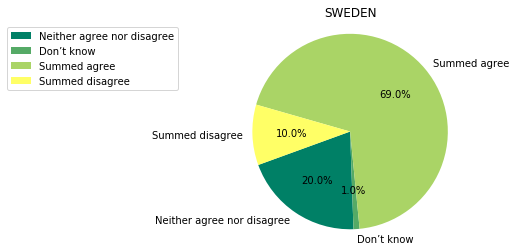

In [33]:
visualize_data_on_pie_chart('Sweden', df_migration_to_my_country_with_summed_values)

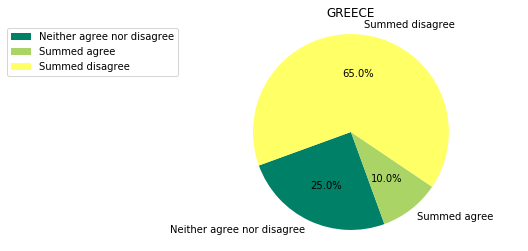

In [34]:
visualize_data_on_pie_chart('Greece', df_migration_to_my_country_with_summed_values)

It looks like Sweden and Greece have almost opposite values for:
- _Summed agree_
- _Summed disagree_

What is worth noting, Greece hasn't got possitive attitude towards immigration into their country. 
Maybe it is caused by bad feelings related to the frequent integration with immigrants (see: "Interaction frequency with immigrants")

## Religious denomination

### Christians

It shows how many Christians live in each country. <br>
Intervals (representing population of Christians in percents, where 1 is 100%) will be changed to mean value (based on the lowest and the highest value).

In [35]:
df_christians = read_data_from_csv(filename='christianity')
display(df_christians.sample(5))

,Christians
Country,
Germany,0.6-0.7
Ireland,0.9-0.95
Czech Republic,0.2-0.3
Croatia,0.9-0.95
Spain,0.7-0.8


#### Intervals preprocessing

In [36]:
df_christians = change_interval_to_mean_value_in_all_columns(df_christians)

How it looks now?

In [37]:
display(df_christians.sample(5))

,Christians
Country,
Croatia,0.925
Cyprus,0.750
Slovakia,0.850
Estonia,0.350
Ireland,0.925


### Muslims

It shows how many Muslims live in each country. <br>
Intervals (representing population of Muslims in percents, where 1 is 100%) will be changed to mean value (based on the lowest and the highest value).

In [38]:
df_muslims = read_data_from_csv(filename='islam')
display(df_muslims.sample(5))

,Muslims
Country,
Croatia,0.01-0.02
Ireland,0.01-0.02
Luxemburg,0.02-0.04
Estonia,0-0.01
Italy,0.04-0.05


#### Intervals preprocessing

In [39]:
df_muslims = change_interval_to_mean_value_in_all_columns(df_muslims)

How it looks now?

In [40]:
display(df_muslims.sample(5))

,Muslims
Country,
Lithuania,0.005
Latvia,0.005
Bulgaria,0.150
Cyprus,0.150
Luxemburg,0.030


### Jews

It shows how many Jews live in each country. <br>
Intervals (representing population of Jews in percents, where 1 is 100%) will be changed to mean value (based on the lowest and the highest value).

In [41]:
df_jews = read_data_from_csv(filename='jews')
display(df_jews.sample(5))

,Jews
Country,
Ireland,0-0.001
Sweden,0.001-0.005
Belgium,0.001-0.005
Croatia,0-0.001
Germany,0.001-0.005


#### Intervals preprocessing

In [42]:
df_jews = change_interval_to_mean_value_in_all_columns(df_jews)

How it looks now?

In [43]:
display(df_jews.sample(5))

,Jews
Country,
Germany,0.0030
Czech Republic,0.0005
France,0.0075
Greece,0.0005
Slovenia,0.0005


All data related to religious denomination gathered in one place.
Due to sum per row lower than 1 (caused by other, not included religious denominations), values are normalized to 0-1.

In [44]:
df_religious_denomination = pd.concat([
    df_christians.copy(),
    df_muslims.copy(),
    df_jews.copy()
], sort=False, axis=1)

df_religious_denomination = df_religious_denomination.div(df_religious_denomination.sum(axis=1), axis=0)
display(df_religious_denomination.sample(5))

,Christians,Muslims,Jews
Country,,,
Estonia,0.977654,0.013966,0.008380
Greece,0.918422,0.081037,0.000540
Romania,0.994391,0.005099,0.000510
Slovenia,0.960922,0.038437,0.000641
Belgium,0.892857,0.103022,0.004121


In [45]:
christians = df_christians['Christians'].idxmax(), df_christians['Christians'].max()
muslims = df_muslims['Muslims'].idxmax(), df_muslims['Muslims'].max()
jews = df_jews['Jews'].idxmax(), df_jews['Jews'].max()
print('Religious denominations: max number of percents and one of countries with this value:')
print(f"CHRISTIANS: {christians[1] * 100}% of population e.g. in {christians[0]}")
print(f"MUSLIMS: {muslims[1] * 100}% of population e.g. in {muslims[0]}")
print(f"JEWS: {jews[1] * 100}% of population e.g. in {jews[0]}")

Religious denominations: max number of percents and one of countries with this value:
CHRISTIANS: 97.5% of population e.g. in Malta
MUSLIMS: 15.000000000000002% of population e.g. in Bulgaria
JEWS: 0.75% of population e.g. in France


Christianity is the most popular religious denomination in EU. Differences between population of Christians, Muslims and Jews in EU are huge.

## Race

### Black people
I have found that about 12 million of black people live in Europe. 
I haven't found value for 16 out of 28 countries so I decided to fill it to: <br> <br>
$$\frac{\text{number of black people in EU - number of black people for 12 countries}}{\text{number of countries with missing value}}$$



In [46]:
df_black_people = read_data_from_csv(filename='black_people')

Preprocesing:
- fill Nan values
- round to int

In [47]:
NUMBER_OF_BLACK_PEOPLE_IN_EUROPE = 12000000
nan_values_num = df_black_people.isnull().values.sum()
value_to_fill = (NUMBER_OF_BLACK_PEOPLE_IN_EUROPE - df_black_people.sum()) / nan_values_num
df_black_people.fillna(value_to_fill, inplace=True)
df_black_people = df_black_people.round()

How it looks now?

In [48]:
display(df_black_people.sample(5))

,Black people
Country,
United Kingdom,2500000.0
Netherlands,700000.0
Lithuania,131973.0
France,3000000.0
Denmark,131973.0


### Asian people
I haven't found any reliable information related to Asian population in EU so I decided to set it to 2% of population in each country. <br>
Maybe for some places it is a huge number but I believe it will equalize at all.

In [49]:
df_asian_people = df_population.copy()
df_asian_people['Population'] = df_asian_people['Population'] * 0.02
df_asian_people.rename(columns={'Population': 'Asian people'}, inplace=True)
df_asian_people = df_asian_people.round()

In [50]:
display(df_asian_people.sample(5))

,Asian people
Country,
Estonia,26319.0
Croatia,83813.0
Luxemburg,11525.0
Portugal,206827.0
Malta,8688.0


### White people
I don't want to introduce confusion because of other races than black, asian and white people in EU so I decided to set the rest of population to white.

In [51]:
df_white_people = df_population.copy()
df_white_people['Population'] = df_white_people['Population'] - (
            df_black_people['Black people'] + df_asian_people['Asian people'])
df_white_people.rename(columns={'Population': 'White people'}, inplace=True)
df_white_people = df_white_people.round()

In [52]:
display(df_white_people.sample(5))

,White people
Country,
Portugal,9984503.0
Belgium,10164056.0
Ireland,4564055.0
Finland,5328813.0
Sweden,9503997.0


All data related to race gathered in one place.
Due to storing number of people, values are diveded by population in country to obtain percentage share in the population.

In [53]:
df_race = pd.concat([
    df_black_people.copy(),
    df_asian_people.copy(),
    df_white_people.copy()
], sort=False, axis=1)

df_race = df_race.div(df_population.sum(axis=1), axis=0)
display(df_race.sample(5))

,Black people,Asian people,White people
Country,,,
Spain,0.014708,0.02,0.965292
Netherlands,0.041227,0.02,0.938773
Poland,0.003476,0.02,0.976524
France,0.045003,0.02,0.934997
Italy,0.017077,0.02,0.962923


## All data gathered in one place for
- agent's attribute
- conditions to move to another country <br>

and saved to csv file.

In [54]:
df_conditions = pd.concat([
    df_immigrants_to_population.copy(),
    df_integration_frequency.copy(),
    df_children_relationship.copy(),
    df_immigrant_as_your_X.iloc[:, :2].copy(),
    df_migration_to_another_country.iloc[:, :2].copy(),
    df_migration_to_my_country.iloc[:, :4].copy()
], sort=False, axis=1)

df_conditions.to_csv('data/conditions.csv', sep=';', encoding='utf-8')

In [55]:
df_agents_attributes = pd.concat([
    df_country_as_origin_probability.copy(),
    df_immigrants_to_population.copy(),
    df_religious_denomination.copy(),
    df_race.copy()
], sort=False, axis=1)

df_agents_attributes.to_csv('data/agents_attributes.csv', sep=';', encoding='utf-8')